In [93]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [94]:
import numpy as np
import pandas as pd

In [95]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [96]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [97]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [98]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [99]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [100]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [101]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 'USC00519397', '2016-09-12', 0.0, 78.0)
(23

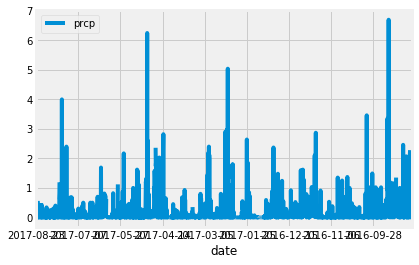

In [81]:
# Design a query to retrieve the last 12 months of precipitation data.

last_twelve = session.execute("SELECT * FROM Measurement WHERE date between '2016-08-23' and '2017-08-23'")
for result in last_twelve:
    print(result)

# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago
# Perform a query to retrieve the date and precipitation scores
date_prcp = session.execute("Select date, prcp FROM Measurement WHERe date between '2016-08-23' and '2017-08-23'")
for result in date_prcp:
    print(result)

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
date_prcp_df = pd.DataFrame(date_prcp, columns=['date', 'prcp'])
date_prcp_df.set_index('date', inplace=True)
date_prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_sorted.plot()



![precipitation](Images/precipitation.png)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [102]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [103]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_active = pd.read_sql("SELECT station FROM Measurement", conn)
stations_active['station'].value_counts()


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [105]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
min =session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(min, max, average)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [107]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_twelve_months = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago).all()
temp_df = pd.DataFrame(temp_twelve_months)
temp_df.set_index('station', inplace=True)
temp_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


![precipitation](Images/station-histogram.png)

In [108]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [112]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip = calc_temps('2017-07-02', '2017-07-08')
my_trip


[(71.0, 78.11904761904762, 87.0)]

<function matplotlib.pyplot.show(*args, **kw)>

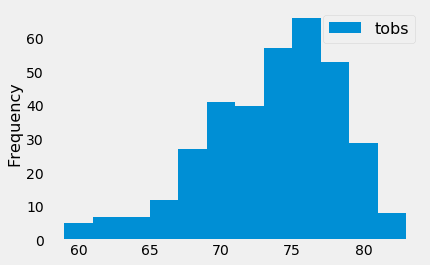

In [113]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_df.plot.hist(by='station', bins=12)
plt.grid()
plt.ylabel("Frequency", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


<IPython.core.display.Javascript object>


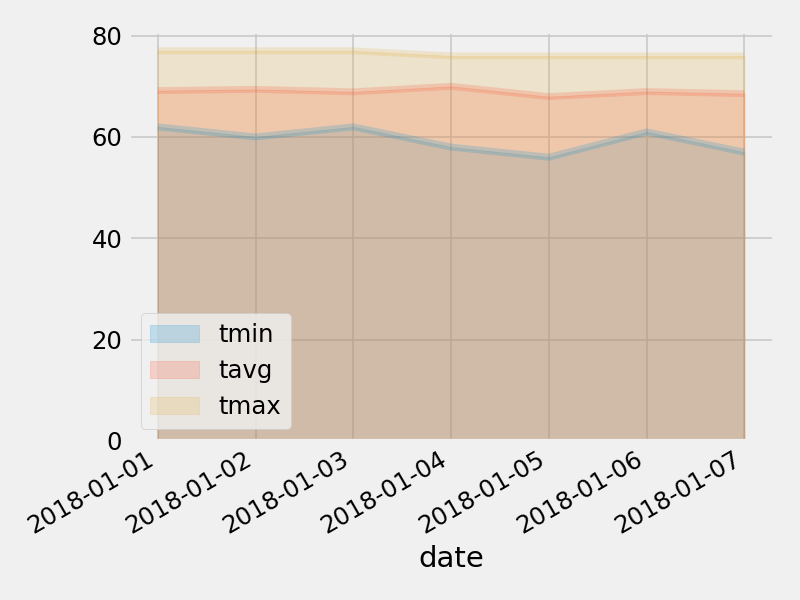

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
